<a href="https://colab.research.google.com/github/Rishabh672003/Learning-machine-learning/blob/main/conv_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [6]:
K = len(set(y_train))
K

10

In [10]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2,activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 20)


Epoch 1/20
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5526 - accuracy: 0.8048 - val_loss: 0.4207 - val_accuracy: 0.8445
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3911 - accuracy: 0.8551 - val_loss: 0.4082 - val_accuracy: 0.8490
Epoch 3/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3532 - accuracy: 0.8686 - val_loss: 0.3638 - val_accuracy: 0.8735
Epoch 4/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3314 - accuracy: 0.8764 - val_loss: 0.3521 - val_accuracy: 0.8686
Epoch 5/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3133 - accuracy: 0.8822 - val_loss: 0.3492 - val_accuracy: 0.8729
Epoch 6/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2949 - accuracy: 0.8891 - val_loss: 0.3460 - val_accuracy: 0.8749
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2859 - accuracy: 0.8928 - val_loss: 0.3527 -

<function matplotlib.pyplot.legend(*args, **kwargs)>

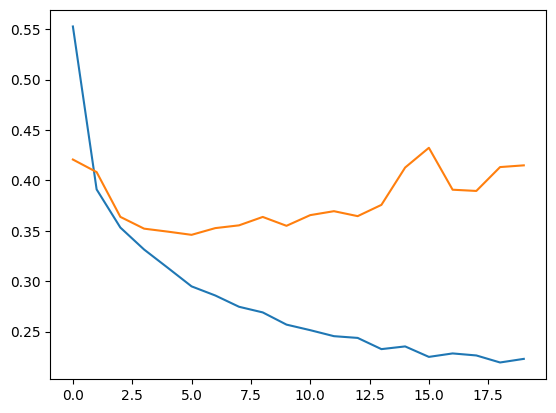

In [16]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val-loss')
plt.legend

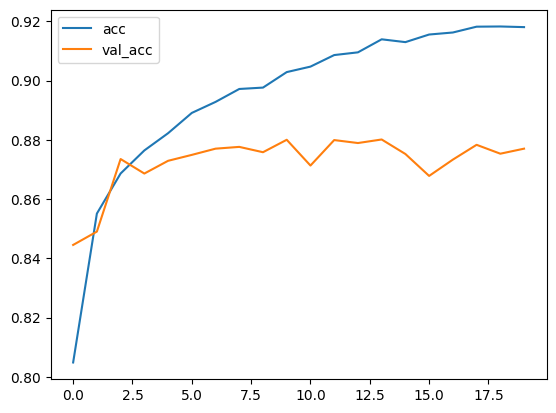

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[868   2  21  23   3   1  73   0   9   0]
 [  6 973   0  14   4   0   3   0   0   0]
 [ 17   2 767  11 136   0  64   0   3   0]
 [ 24   7  17 868  53   0  28   0   3   0]
 [  0   0  46  12 866   0  76   0   0   0]
 [  0   0   0   1   0 963   0  25   0  11]
 [172   1  90  24  92   0 604   0  16   1]
 [  0   0   0   0   0  15   0 916   0  69]
 [  4   0   5   3   5   5  10   2 966   0]
 [  1   0   0   0   0   4   0  16   0 979]]


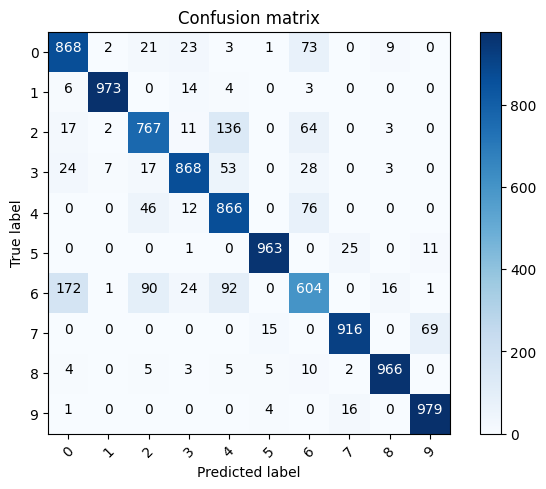

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

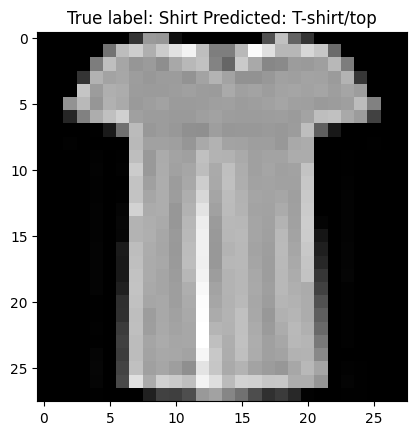

In [22]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
